### Create venv for install libs

In [1]:
# Set-ExecutionPolicy Unrestricted -Scope Process 

# ubuntu : python -m venv venvs/venv_name
# start venv : source path_to_venv/venv_name/bin/activate

# windows : python -m venv .\venvs\venv_name
# start venv : .\path_to_venv\venv_name\Scripts\activate    (Activate.ps1)
# ctrl + shift + p -> Python: Select Interpreter ->  path/to/Scripts/python.exe -> reboot VS Code

### Install libs

In [2]:
# pip install pandas numpy matplotlib

In [3]:
# pip install torch torchvision torchaudio

In [4]:
# pip install tqdm

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import torch

from tqdm import tqdm

# Начало работы с Pytorch

In [6]:
# Создание тензора размером 2x3

tensor1 = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(tensor1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [7]:
tensor2 = torch.tensor([[6., 5., 4.], [3., 2., 1.]])
print(tensor2)

tensor([[6., 5., 4.],
        [3., 2., 1.]])


In [8]:
tensor1 + tensor2

tensor([[7., 7., 7.],
        [7., 7., 7.]])

In [3]:
x = torch.tensor(3., requires_grad=True)
y = (x ** 2) + 2 + (x ** 3)
y.backward()
print(x.grad)

tensor(33.)


# Задача 1. Предсказание значения y

## Сгенерируем данные (линейно зависимые y = kx + b)

In [10]:
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

In [11]:
# print(len(X))

Преобразуем данные в тензоры

In [12]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

Разделим на обучающаю и тестовую выборки

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [15]:
print(f"X_train - {len(X_train)}, X_test - {len(X_test)}")
print(f"y_train - {len(y_train)}, y_test - {len(y_test)}")

X_train - 800, X_test - 200
y_train - 800, y_test - 200


Построим график распределения наших сгенерированных данных

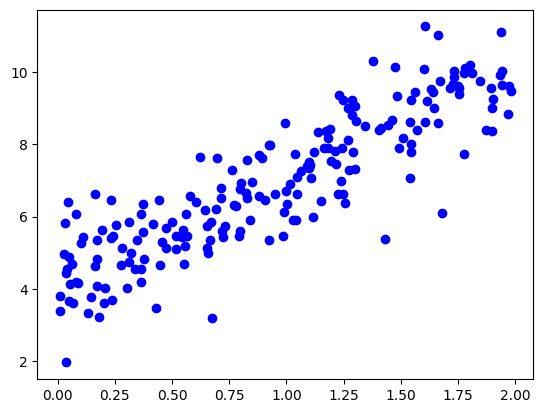

In [16]:
plt.scatter(X_test.numpy(), y_test.numpy(), color='blue', label='Actual Values')

<!-- Цель: построить полином некой степени, максимально "хорошо" описывающий данные -->

## Инициализация модели

In [2]:
import torch
import torch.nn as nn

import torch.optim as optim

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self): #создание модели
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(in_features=1, out_features=64)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 256)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 1024)
        self.ac3 = nn.ReLU()
        self.fc4 = nn.Linear(1024, 1)

    def forward(self, x): #функция описывающая работу модели
        x = self.fc1(x)
        x = self.ac1(x)
        
        x = self.fc2(x)
        x = self.ac2(x)
        
        x = self.fc3(x)
        x = self.ac3(x)
        
        x = self.fc4(x)
        return x

In [19]:
model = LinearRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

## Обучение

In [20]:
num_epochs = 100                         # можно выбрать самим
train_losses = []

for epoch in range(num_epochs):
    model.train()
    
    y_pred = model(X_train)              # Прямой проход
    
    loss = criterion(y_pred, y_train)    # Вычисление потерь
    
    optimizer.zero_grad()                # Обнуление градиентов
    loss.backward()                      # Вычисление градиентов
    optimizer.step()                     # Обновление параметров
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 15.3543
Epoch [20/100], Loss: 6.6435
Epoch [30/100], Loss: 3.1068
Epoch [40/100], Loss: 1.1956
Epoch [50/100], Loss: 1.0067
Epoch [60/100], Loss: 1.0220
Epoch [70/100], Loss: 1.0203
Epoch [80/100], Loss: 1.0134
Epoch [90/100], Loss: 1.0081
Epoch [100/100], Loss: 1.0058


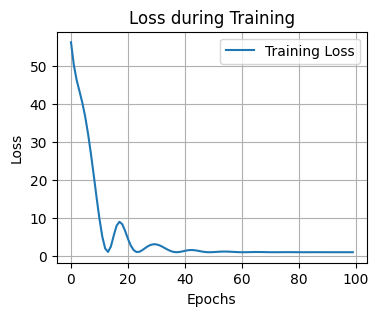

In [21]:
plt.figure(figsize=(4, 3))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Тестировка результатов

In [22]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

Выведем графики

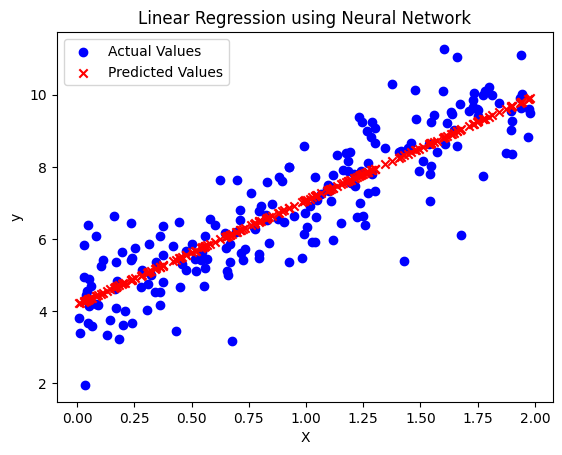

In [23]:
plt.scatter(X_test.numpy(), y_test.numpy(), color='blue', label='Actual Values')
plt.scatter(X_test.numpy(), y_pred.numpy(), color='red', label='Predicted Values', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Neural Network')
plt.legend()
plt.show()

# Задача 2. Предсказание стоимости квартиры

In [24]:
num_samples = 1000

# Признаки: размер (в квадратных метрах), номер этажа, количество комнат, можно добавить любой свой (необязательно числовой)
sizes = np.random.randint(30, 150, size=(num_samples, 1))   # Размер квартиры
floors = np.random.randint(1, 10, size=(num_samples, 1))    # Номер этажа
rooms = np.random.randint(1, 5, size=(num_samples, 1))      # Количество комнат

# Создание признаков
X = np.hstack((sizes, floors, rooms))

# Создание целевой переменной (стоимость квартиры)
# Приблизительная формула: стоимость = 1000 * размер + 5000 * номер этажа + 8000 * количество комнат + шум (погрешность)
y = 1000 * sizes + 5000 * floors + 8000 * rooms + np.random.randn(num_samples, 1) * 1000

In [25]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

Выполним стандартизацию данных

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tensor = torch.FloatTensor(scaler.fit_transform(X_tensor))

Пример работы стандартизации (среднее значение = 0, среднее отклонение = 1)

In [27]:
data = np.array([[1, 2], [3, 4], [5, 6]])

print(torch.FloatTensor(scaler.fit_transform(data)))

tensor([[-1.2247, -1.2247],
        [ 0.0000,  0.0000],
        [ 1.2247,  1.2247]])


## Разделение на обучающую и тестовую выборки

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

## Инициализация модели

In [29]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(3, 64)  # Вход: 3 признака, скрытый слой с 64 нейронами
        self.fc2 = nn.Linear(64, 256)
        self.fc3 = nn.Linear(256, 1024)
        self.fc4 = nn.Linear(1024, 1)   # Выход: 1 (стоимость квартиры)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [30]:
model = LinearRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Обучение модели

In [31]:
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    
    y_pred = model(X_train)

    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 19137798144.0000
Epoch [20/100], Loss: 14794285056.0000
Epoch [30/100], Loss: 1571144448.0000
Epoch [40/100], Loss: 941375232.0000
Epoch [50/100], Loss: 924947904.0000
Epoch [60/100], Loss: 444940032.0000
Epoch [70/100], Loss: 282709856.0000
Epoch [80/100], Loss: 241340784.0000
Epoch [90/100], Loss: 207588592.0000
Epoch [100/100], Loss: 178375552.0000


{'col1': [1, 2, 3, 4, 5], 'col2': [1, 3, 5, 6, 7]}

In [17]:
data = pd.DataFrame({'element_uid': ['a', 'b', 'c', 'd', 'e'], 'col1': [1, 2, 3, 4, 5]})
data

,element_uid,col1
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


In [20]:
empty_data = pd.DataFrame()

In [19]:
new_data = pd.DataFrame({'element_uid': ['a', 'b', 'c', 'd', 'e'], 'col3': [7, 6, 7 , 8 , 9]})
new_data

,element_uid,col3
0,a,7
1,b,6
2,c,7
3,d,8
4,e,9


In [23]:
empty_data.join(new_data, how='inner', on='element_uid')

KeyError: 'element_uid'

In [15]:
blended_models = pd.concat([data, new_data], )

In [16]:
blended_models

,col1,col2,col3
0,1.0,1.0,NaN
1,2.0,3.0,NaN
2,3.0,5.0,NaN
3,4.0,6.0,NaN
4,5.0,7.0,NaN
0,NaN,NaN,7.0
1,NaN,NaN,6.0
2,NaN,NaN,7.0
3,NaN,NaN,8.0
4,NaN,NaN,9.0


In [7]:
cols = ['col1', 'col2']

In [9]:
data[cols].sum(axis=1)

0     2
1     5
2     8
3    10
4    12
dtype: int64

In [32]:
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)

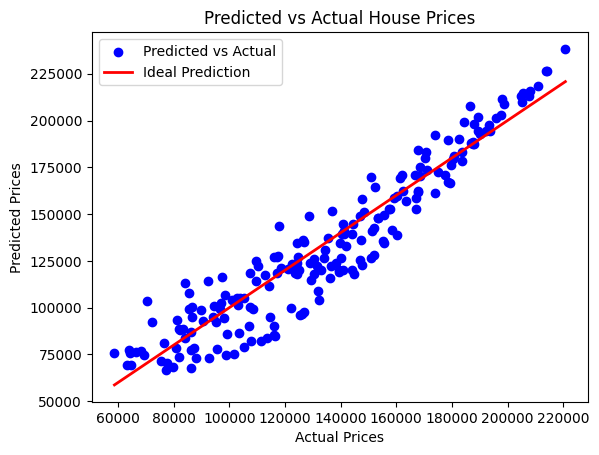

In [33]:
plt.scatter(y_test.numpy(), y_test_pred.numpy(), color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.legend()
plt.show()

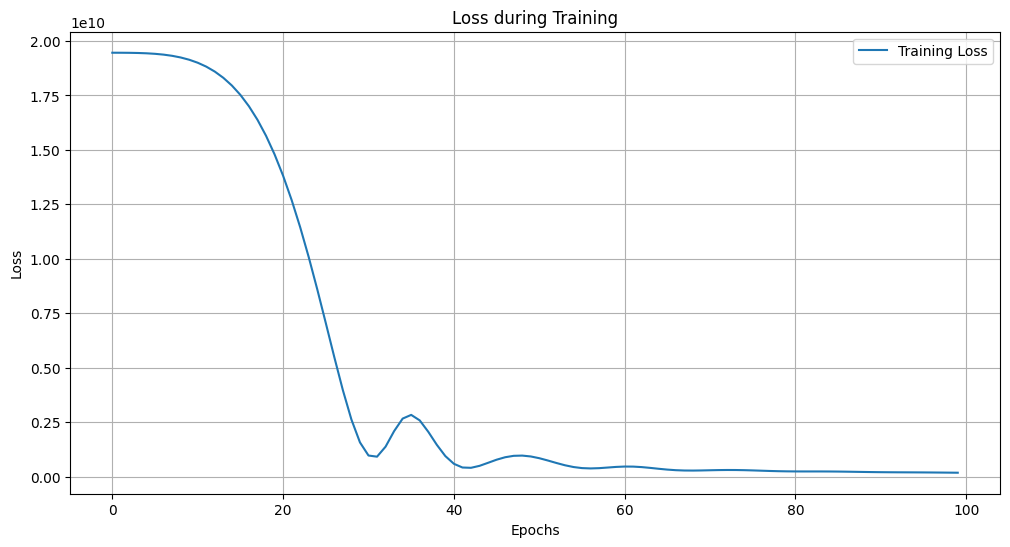

In [34]:
# Построение графика лосса
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Задача 3. Выплата кредита

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
income = np.random.randint(20000, 100000, size=(num_samples, 1))                # Доход в месяц
credit_history = np.random.randint(0, 2, size=(num_samples, 1))                 # Наличие кредитной истории (0 или 1)
children = np.random.randint(0, 5, size=(num_samples, 1))                       # Количество детей
has_job = np.random.randint(0, 2, size=(num_samples, 1))                        # Есть работа (0 или 1)

# target переменная
y = (income * 0.000005 + credit_history * 0.1 + children * 0.2 + has_job * 0.8 + np.random.normal(0, 0.1, size=(num_samples, 1)) > 0.5).astype(int)

In [37]:
X = np.hstack((income, credit_history, children, has_job))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [40]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1)

In [41]:
class LogisticRegressionNN(nn.Module):
    def __init__(self):
        super(LogisticRegressionNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [42]:
model = LogisticRegressionNN()

criterion = nn.BCELoss()  # Бинарная кросс-энтропия для логистической регрессии
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [43]:
num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor).view(-1)  # Изменяем форму для BCELoss
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Вычисление точности
    with torch.no_grad():
        predicted = (outputs > 0.5).float()  # Предсказание классов
        accuracy = accuracy_score(y_train_tensor.numpy(), predicted.numpy())
        train_accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Epoch [10/100], Loss: 0.2860, Accuracy: 0.8450
Epoch [20/100], Loss: 0.1728, Accuracy: 0.9387
Epoch [30/100], Loss: 0.1307, Accuracy: 0.9387
Epoch [40/100], Loss: 0.1116, Accuracy: 0.9475
Epoch [50/100], Loss: 0.1044, Accuracy: 0.9487
Epoch [60/100], Loss: 0.1012, Accuracy: 0.9500
Epoch [70/100], Loss: 0.0993, Accuracy: 0.9513
Epoch [80/100], Loss: 0.0981, Accuracy: 0.9550
Epoch [90/100], Loss: 0.0971, Accuracy: 0.9563
Epoch [100/100], Loss: 0.0964, Accuracy: 0.9563


In [44]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).view(-1)
    test_loss = criterion(test_outputs, y_test_tensor)
    test_predicted = (test_outputs > 0.5).float()
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predicted.numpy())
    
print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.0886, Test Accuracy: 0.9450


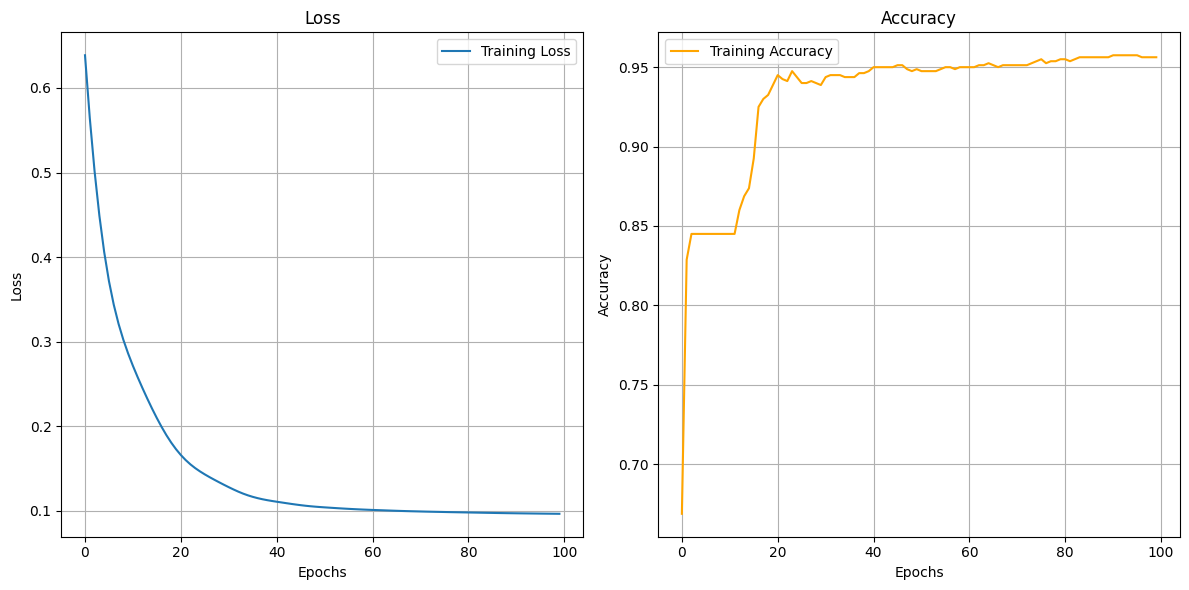

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()